In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import math

In [2]:
df = pd.read_csv('../1.data-preparation/new-data/data_Y1.csv')

In [3]:
df.head()

,Year,MemberID,LabCount_total,LabCount_months,DrugCount_total,DrugCount_months,no_Claims,no_Providers,no_Vendors,no_PCPs,...,age_55,age_65,age_75,age_85,age_MISS,SexMALE,sexFEMALE,sexMISS,ClaimsTruncated,TARGET
0,Y1,210,2.0,1.0,5.0,3.0,8,4,4,2,...,0,0,0,0,0,0,0,1,0,0
1,Y1,3889,10.0,1.0,30.0,10.0,13,7,7,1,...,0,0,0,0,1,0,1,0,0,0
2,Y1,11951,3.0,1.0,0.0,0.0,6,3,3,1,...,0,0,0,0,0,0,1,0,0,1
3,Y1,14661,2.0,1.0,1.0,1.0,2,2,2,1,...,0,0,0,0,0,0,0,1,0,0
4,Y1,14778,2.0,1.0,6.0,5.0,6,5,4,2,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(76038, 118)

In [14]:
df.dtypes

Year                          object
MemberID                       int64
LabCount_total               float64
LabCount_months              float64
DrugCount_total              float64
DrugCount_months             float64
no_Claims                      int64
no_Providers                   int64
no_Vendors                     int64
no_PCPs                        int64
no_PlaceSvcs                   int64
no_Specialities                int64
no_PrimaryConditionGroups      int64
no_ProcedureGroups             int64
PayDelay_total                 int64
PayDelay_max                   int64
PayDelay_min                   int64
pgc1                           int64
pgc2                           int64
pgc3                           int64
pgc4                           int64
pgc5                           int64
pgc6                           int64
pgc7                           int64
pgc8                           int64
pgc9                           int64
pgc10                          int64
p

In [5]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MemberID,76038.0,4.994761e+07,2.890145e+07,210.0,24837194.75,49907210.0,75101120.75,99998627.0
LabCount_total,76038.0,6.148886e+00,7.233436e+00,0.0,0.00,4.0,10.00,89.0
LabCount_months,76038.0,1.580289e+00,1.814161e+00,0.0,0.00,1.0,2.00,12.0
DrugCount_total,76038.0,1.011830e+01,1.535346e+01,0.0,0.00,3.0,14.00,84.0
DrugCount_months,76038.0,3.703661e+00,4.089925e+00,0.0,0.00,2.0,7.00,12.0
no_Claims,76038.0,1.132022e+01,1.048049e+01,0.0,3.00,8.0,16.00,43.0
no_Providers,76038.0,4.404127e+00,3.341382e+00,0.0,2.00,3.0,6.00,27.0
no_Vendors,76038.0,3.705805e+00,2.615952e+00,0.0,2.00,3.0,5.00,19.0
no_PCPs,76038.0,1.022344e+00,1.506214e-01,0.0,1.00,1.0,1.00,3.0
no_PlaceSvcs,76038.0,2.145335e+00,1.021198e+00,0.0,1.00,2.0,3.00,8.0


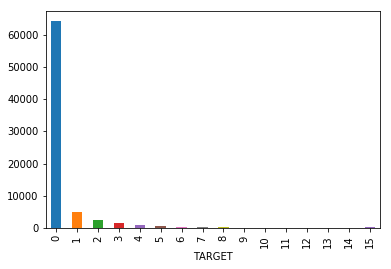

In [8]:
df.groupby(['TARGET']).size().plot.bar()

In [9]:
df.groupby(['TARGET']).size()

TARGET
0     64269
1      4835
2      2366
3      1453
4       977
5       565
6       373
7       256
8       173
9       148
10      106
11       80
12       73
13       61
14       42
15      261
dtype: int64

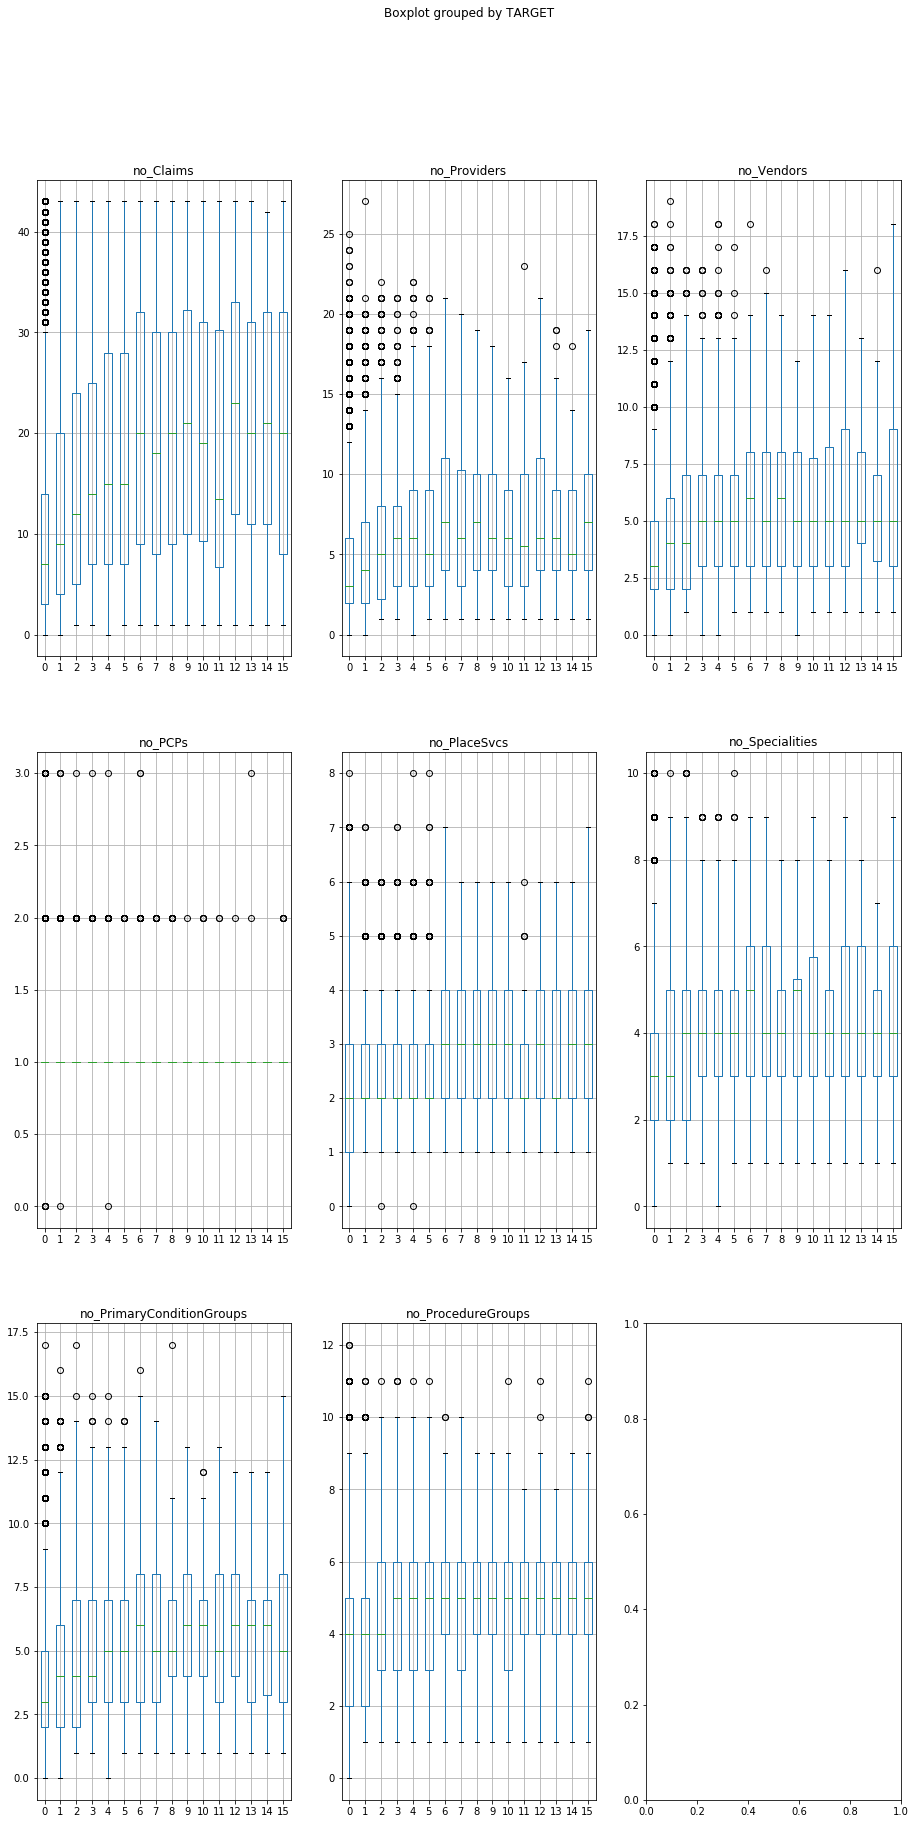

In [30]:
ls_num_data = [col for col in df.columns if 'no_' in col]
ncols = 3
nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Visualization of numerical data
for idx, var in enumerate(ls_num_data):
    i = idx // ncols
    j = idx % ncols
    axes[i, j].get_xaxis().get_label().set_visible(False)
    df.boxplot(column=var, by='TARGET', ax=axes[i, j])

Feature ranking:
1. feature 4 no_Claims (0.190441)
2. feature 113 sexMISS (0.086359)
3. feature 114 ClaimsTruncated (0.083879)
4. feature 5 no_Providers (0.080115)
5. feature 10 no_PrimaryConditionGroups (0.068731)
6. feature 2 DrugCount_total (0.065030)
7. feature 6 no_Vendors (0.049622)
8. feature 12 PayDelay_total (0.048623)
9. feature 110 age_MISS (0.046857)
10. feature 112 sexFEMALE (0.041145)
11. feature 109 age_85 (0.036876)
12. feature 0 LabCount_total (0.023881)
13. feature 111 SexMALE (0.023608)
14. feature 1 LabCount_months (0.015602)
15. feature 14 PayDelay_min (0.008949)
16. feature 11 no_ProcedureGroups (0.008013)
17. feature 9 no_Specialities (0.007926)
18. feature 105 age_45 (0.007436)
19. feature 8 no_PlaceSvcs (0.007107)
20. feature 16 pgc2 (0.006357)
21. feature 103 age_25 (0.006143)
22. feature 13 PayDelay_max (0.005970)
23. feature 3 DrugCount_months (0.005280)
24. feature 21 pgc7 (0.003458)
25. feature 28 pgc14 (0.003451)
26. feature 74 pg1 (0.002979)
27. feature 

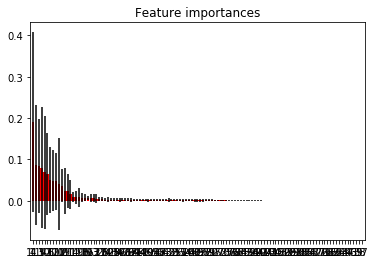

In [29]:
from sklearn.ensemble import RandomForestClassifier

y = df['TARGET']
X = df.loc[:, df.columns != 'TARGET']

X.head()
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], ls_sel_feat[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()